In [1]:
import pandas as pd
# pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data#helps in extracting data from included sources
from matplotlib import pyplot as plt
import datetime
import numpy as np
print(f'{np.__version__}: numpy version')
print(pd.__version__)
# print(f'{data.__version__} : pandas_datareader version')

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


1.18.1: numpy version
1.0.1


In [2]:
#removing SYMC as the data fetched in NAN, look later how to clean the data with SYMC

company_dict={
   'amazon':'AMZN','Apple':'AAPL','Walgreen':'WBA','NOrthrop Grunman':'NOC','Boeing':'BA','Lockhead Martin':'LMT','McDonalds':'MCD',
    'Intel':'INTC','Navister':'NAV','IBM':'IBM','Texas Instrument':'TXN','Mastercard':'MA','Microsoft':'MSFT','General ELectric':'GE',
    'Americal express':'AXP','Pepsi':'PEP','Coca Cola':'KO','Jhonson and Jhonson':'JNJ','Toyota':'TM','Mitsubishi':'MSBHY',
    'Exxon':'XOM','Valero ENgineering':'VLO','Bank of AMerica':'BAC','HOnda':'HMC','Sony':'SNE','Chevren':'CVX','Ford':'F'    
}
company_dict.items()

dict_items([('amazon', 'AMZN'), ('Apple', 'AAPL'), ('Walgreen', 'WBA'), ('NOrthrop Grunman', 'NOC'), ('Boeing', 'BA'), ('Lockhead Martin', 'LMT'), ('McDonalds', 'MCD'), ('Intel', 'INTC'), ('Navister', 'NAV'), ('IBM', 'IBM'), ('Texas Instrument', 'TXN'), ('Mastercard', 'MA'), ('Microsoft', 'MSFT'), ('General ELectric', 'GE'), ('Americal express', 'AXP'), ('Pepsi', 'PEP'), ('Coca Cola', 'KO'), ('Jhonson and Jhonson', 'JNJ'), ('Toyota', 'TM'), ('Mitsubishi', 'MSBHY'), ('Exxon', 'XOM'), ('Valero ENgineering', 'VLO'), ('Bank of AMerica', 'BAC'), ('HOnda', 'HMC'), ('Sony', 'SNE'), ('Chevren', 'CVX'), ('Ford', 'F')])

In [3]:
companies=sorted(company_dict.items(),key=lambda x:x[1])
companies
print(len(companies))

27


In [4]:
list(company_dict.values())

['AMZN',
 'AAPL',
 'WBA',
 'NOC',
 'BA',
 'LMT',
 'MCD',
 'INTC',
 'NAV',
 'IBM',
 'TXN',
 'MA',
 'MSFT',
 'GE',
 'AXP',
 'PEP',
 'KO',
 'JNJ',
 'TM',
 'MSBHY',
 'XOM',
 'VLO',
 'BAC',
 'HMC',
 'SNE',
 'CVX',
 'F']

In [5]:
data_source='yahoo'
start_date='2015-01-01'
end_date='2017-12-31'
#use pandas_reader.data.DataReader 
panel_data=data.DataReader(list(company_dict.values()),data_source,start_date,end_date)

In [6]:
     #printing axes label 
print(panel_data.axes)

[DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None), MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',   'JNJ'),
            (   'Volume',    'TM'),
            (   'Volume', 'MSBHY'),
            (   'Volume',   'XOM'),
            ( 

In [7]:
print(type(panel_data))
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-12-31 to 2017-12-29
Columns: 162 entries, ('Adj Close', 'AMZN') to ('Volume', 'F')
dtypes: float64(162)
memory usage: 962.7 KB


In [8]:
panel_data.describe

<bound method NDFrame.describe of Attributes    Adj Close                                                 \
Symbols            AMZN        AAPL        WBA         NOC          BA   
Date                                                                     
2014-12-31   310.350006  100.905785  66.960152  134.930481  112.812035   
2015-01-02   308.519989   99.945885  66.784416  134.079132  112.786011   
2015-01-05   302.190002   97.130241  65.466286  131.250305  112.004875   
2015-01-06   295.290009   97.139420  65.633263  131.973572  110.685638   
2015-01-07   298.420013   98.501518  67.311653  136.148087  112.404106   
...                 ...         ...        ...         ...         ...   
2017-12-22  1168.359985  169.009430  67.474716  292.089600  281.228210   
2017-12-26  1176.760010  164.721680  68.022247  292.147369  281.475922   
2017-12-27  1182.260010  164.750641  67.613930  294.378082  281.723694   
2017-12-28  1186.099976  165.214188  67.688164  296.426086  282.419434   
2017

In [9]:
panel_data.columns.to_list()

[('Adj Close', 'AMZN'),
 ('Adj Close', 'AAPL'),
 ('Adj Close', 'WBA'),
 ('Adj Close', 'NOC'),
 ('Adj Close', 'BA'),
 ('Adj Close', 'LMT'),
 ('Adj Close', 'MCD'),
 ('Adj Close', 'INTC'),
 ('Adj Close', 'NAV'),
 ('Adj Close', 'IBM'),
 ('Adj Close', 'TXN'),
 ('Adj Close', 'MA'),
 ('Adj Close', 'MSFT'),
 ('Adj Close', 'GE'),
 ('Adj Close', 'AXP'),
 ('Adj Close', 'PEP'),
 ('Adj Close', 'KO'),
 ('Adj Close', 'JNJ'),
 ('Adj Close', 'TM'),
 ('Adj Close', 'MSBHY'),
 ('Adj Close', 'XOM'),
 ('Adj Close', 'VLO'),
 ('Adj Close', 'BAC'),
 ('Adj Close', 'HMC'),
 ('Adj Close', 'SNE'),
 ('Adj Close', 'CVX'),
 ('Adj Close', 'F'),
 ('Close', 'AMZN'),
 ('Close', 'AAPL'),
 ('Close', 'WBA'),
 ('Close', 'NOC'),
 ('Close', 'BA'),
 ('Close', 'LMT'),
 ('Close', 'MCD'),
 ('Close', 'INTC'),
 ('Close', 'NAV'),
 ('Close', 'IBM'),
 ('Close', 'TXN'),
 ('Close', 'MA'),
 ('Close', 'MSFT'),
 ('Close', 'GE'),
 ('Close', 'AXP'),
 ('Close', 'PEP'),
 ('Close', 'KO'),
 ('Close', 'JNJ'),
 ('Close', 'TM'),
 ('Close', 'MSBHY'),

In [10]:
#stock open and close data
stock_close=panel_data['Close']
stock_open=panel_data['Open']

In [11]:
stock_close.iloc[340]

Symbols
AMZN     679.750000
AAPL      92.790001
WBA       80.889999
NOC      214.630005
BA       132.100006
LMT      240.320007
MCD      130.830002
INTC      29.799999
NAV       11.190000
IBM      147.339996
TXN       56.910000
MA        96.720001
MSFT      50.070000
GE        28.721153
AXP       63.980000
PEP      105.279999
KO        45.240002
JNJ      113.720001
TM       102.610001
MSBHY     32.490002
XOM       88.570000
VLO       54.980000
BAC       13.990000
HMC       27.629999
SNE       23.930000
CVX      100.349998
F         13.320000
Name: 2016-05-09 00:00:00, dtype: float64

In [12]:
print(stock_close.shape)
stock_close=np.array(stock_close).T
print(stock_close.shape)

(756, 27)
(27, 756)


In [13]:
print(stock_open.shape)
stock_open=np.array(stock_open).T
print(stock_open.shape)

(756, 27)
(27, 756)


In [14]:
row,column=stock_open.shape
row

27

In [15]:
print([name for name,id in companies],end=' ')

['Apple', 'amazon', 'Americal express', 'Boeing', 'Bank of AMerica', 'Chevren', 'Ford', 'General ELectric', 'HOnda', 'IBM', 'Intel', 'Jhonson and Jhonson', 'Coca Cola', 'Lockhead Martin', 'Mastercard', 'McDonalds', 'Mitsubishi', 'Microsoft', 'Navister', 'NOrthrop Grunman', 'Pepsi', 'Sony', 'Toyota', 'Texas Instrument', 'Valero ENgineering', 'Walgreen', 'Exxon'] 

In [16]:
print(len(companies))

27


In [17]:
#we are now calculating how far the stocks have been changed during this tenure.
#defining a placeholder matrix with the dimension of the final matrix 

movements=np.zeros(([row,column]))
for i in range (row):
    movements[i,:]=np.subtract(stock_close[i,:],stock_open[i,:])
for i in range(len(companies)):
    print('company: {}, change:{}'.format(companies[i][0], sum(movements[i][:])))
print(movements.shape)

print(max(movements[4]))

company: Apple, change:-83.93020629882812
company: amazon, change:14.249893188476562
company: Americal express, change:-5.940071105957031
company: Boeing, change:72.03007507324219
company: Bank of AMerica, change:100.44984436035156
company: Chevren, change:57.899932861328125
company: Ford, change:51.290016174316406
company: General ELectric, change:19.52003288269043
company: HOnda, change:-0.6599926948547363
company: IBM, change:15.669967651367188
company: Intel, change:28.409912109375
company: Jhonson and Jhonson, change:23.569869995117188
company: Coca Cola, change:28.480026245117188
company: Lockhead Martin, change:4.509649276733398
company: Mastercard, change:5.600105285644531
company: McDonalds, change:36.96997833251953
company: Mitsubishi, change:11.459976196289062
company: Microsoft, change:30.619949340820312
company: Navister, change:-17.430099487304688
company: NOrthrop Grunman, change:30.440019607543945
company: Pepsi, change:9.929985046386719
company: Sony, change:29.3999938

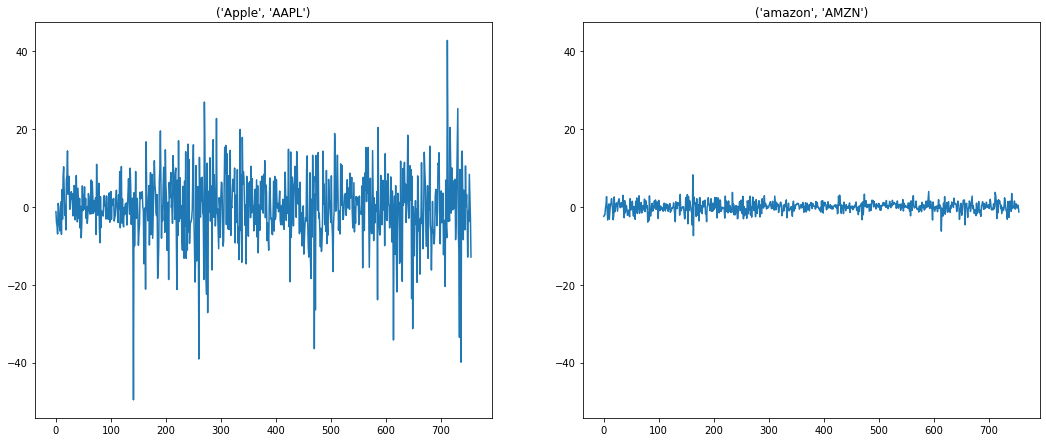

In [18]:
#Now since we have the desired data, lets visualize the data now with matplotlib
plt.clf
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])
plt.subplot(222,sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [19]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
new=normalizer.fit_transform(movements)
print(new.max())
print(new.min())
print(new.mean())

0.26029795916062815
-0.259844372052625
0.001004217288652731


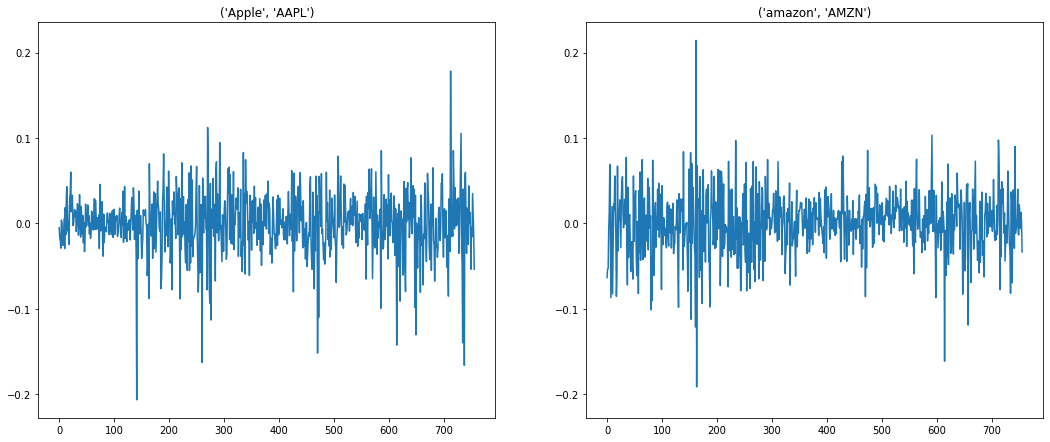

In [25]:

plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])
plt.subplot(222,sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [21]:
#Now we are going to make a pipeline and see how it works
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [100]:
normalizer=Normalizer()
#Create a Kmeans cluster with 10 clusters 
kmeans=KMeans(n_clusters=10,max_iter=1000)
#now lets make a pipeline
#we are using make_pipeline here, only difference with pipeline is that make_pipeline takes the name automatically where in pipeline
# we need to provide name for the estimator
pipeline=make_pipeline(normalizer,kmeans)


In [101]:
# now lets fit the data to the pipeline
pipeline.fit(movements)
print(kmeans.inertia_)
#Study more about kmeans.inertia_

9.085817870359204


In [102]:
labels=pipeline.predict(movements)
# print(len(labels))
# print(len(companies))
df=pd.DataFrame({'companies':companies,'labels':labels})
print(df.sort_values('labels'))

                     companies  labels
13      (Lockhead Martin, LMT)       0
24   (Valero ENgineering, VLO)       1
23     (Texas Instrument, TXN)       1
22                (Toyota, TM)       1
18             (Navister, NAV)       1
14            (Mastercard, MA)       1
26                (Exxon, XOM)       1
2      (Americal express, AXP)       1
7       (General ELectric, GE)       2
1               (amazon, AMZN)       2
12             (Coca Cola, KO)       2
0                (Apple, AAPL)       2
10               (Intel, INTC)       2
9                   (IBM, IBM)       2
11  (Jhonson and Jhonson, JNJ)       2
6                    (Ford, F)       3
17           (Microsoft, MSFT)       3
5               (Chevren, CVX)       4
4       (Bank of AMerica, BAC)       4
3                 (Boeing, BA)       4
8                 (HOnda, HMC)       5
25             (Walgreen, WBA)       6
20                (Pepsi, PEP)       6
19     (NOrthrop Grunman, NOC)       7
15            (McDonalds,

In [103]:
# Now we will apply pca and then apply kmeans on the data with reduced dimension
from sklearn.decomposition import PCA

In [104]:
reduced_data=PCA(n_components=2).fit_transform(new)

In [105]:
kmeans=KMeans(n_clusters=10)
model=kmeans.fit(reduced_data)
labels=model.predict(reduced_data)

In [106]:
df=pd.DataFrame({'companies':companies,'labels':labels,})
print(df.sort_values('labels'))

                     companies  labels
26                (Exxon, XOM)       0
22                (Toyota, TM)       0
8                 (HOnda, HMC)       0
6                    (Ford, F)       1
23     (Texas Instrument, TXN)       2
21                 (Sony, SNE)       2
18             (Navister, NAV)       2
14            (Mastercard, MA)       2
12             (Coca Cola, KO)       3
11  (Jhonson and Jhonson, JNJ)       3
0                (Apple, AAPL)       3
1               (amazon, AMZN)       3
10               (Intel, INTC)       3
13      (Lockhead Martin, LMT)       4
5               (Chevren, CVX)       5
15            (McDonalds, MCD)       5
16         (Mitsubishi, MSBHY)       5
17           (Microsoft, MSFT)       5
3                 (Boeing, BA)       5
25             (Walgreen, WBA)       6
20                (Pepsi, PEP)       6
7       (General ELectric, GE)       7
24   (Valero ENgineering, VLO)       7
9                   (IBM, IBM)       8
19     (NOrthrop Grunman,

In [107]:
#now we will create a meshgrid using np.mesh 
# step size
h=0.1
#plotting the discision boundary
x_min,x_max=reduced_data[0].min()-1,reduced_data.max()+1
y_min,y_max=reduced_data[1].min()-1,reduced_data.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max, h))



In [108]:
a=np.arange(18).reshape(3,6)
b=np.arange(0,18,1)
print(a)
print(b)
print(a.ravel(order='A'))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [109]:
z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

In [110]:
print(xx.shape)
print(yy.shape)

(26, 28)
(26, 28)


In [111]:
#put the result into a color plot
z=z.reshape(xx.shape)

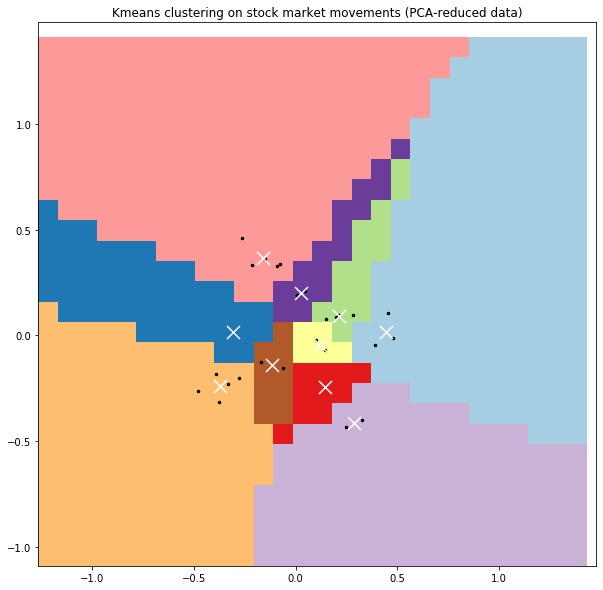

In [112]:
from matplotlib import cm

# define color plot

cmap=plt.cm.Paired

#plotting figure

plt.figure(figsize=(10,10))
plt.imshow(z,interpolation='nearest',extent=(xx.min(),xx.max(), yy.min(),yy.max()),cmap=cmap, aspect='auto',origin='lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize=5)

#plot the centroids of each cluster as  a white x

centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=169,linewidths=3,color='w',zorder=10)
plt.title('Kmeans clustering on stock market movements (PCA-reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.show()